In [24]:
from subprocess import Popen, PIPE

def run_ampl(filepath: str) -> str:
    command = ["ampl", filepath]

    process = Popen(command, stdout=PIPE, cwd="..", text=True, encoding="UTF-8")
    (out_text, _) = process.communicate()
    exit_code = process.wait()

    if exit_code != 0:
        raise Exception(f"command '{' '.join(command)}' exited with code: {exit_code}")

    return out_text

In [25]:
z2_a_out_text = run_ampl("./src/z2-a.run")
print(z2_a_out_text)

:     out_risk out_profit_average    :=
0       0            -300
20     19.999         529.344
40     39.9983       1208.7
60     59.9976       1888.06
80     79.9969       2567.41
100    99.9963       3246.77
120   119.996        3926.12
140   139.995        4605.48
160   159.994        5284.84
180   179.994        5964.19
200   199.993        6575.19
220   219.992        7029.88
240   239.992        7416.47
260   259.992        7737.82
280   279.991        8030.35
300   299.991        8322.88
320   319.991        8614.61
340   339.991        8901.78
360   359.99         9188.96
380   379.99         9476.14
400   399.99         9763.32
420   419.989       10050.5
440   439.989       10337.7
460   459.989       10624.9
480   479.989       10912
500   499.988       11164
520   519.988       11408.3
540   539.988       11652.6
560   559.988       11896.9
580   579.987       12141.2
600   599.987       12385.6
620   619.987       12620
640   639.987       12823
660   659.986       13026.

In [26]:
from ampl import parse_ampl_table
from io import StringIO

z2_a_out = StringIO(z2_a_out_text)
z2_a_df = parse_ampl_table(z2_a_out)
z2_a_df.head()

,out_risk,out_profit_average
0,0.0,-300.0
20,19.999,529.344
40,39.9983,1208.7
60,59.9976,1888.06
80,79.9969,2567.41


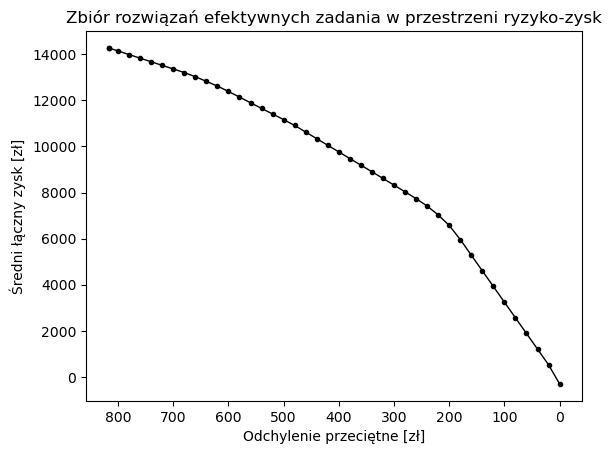

In [32]:
import numpy as np
from matplotlib import pyplot as plt


ax = plt.subplot(1, 1, 1)
ax.plot(z2_a_df["out_risk"], z2_a_df["out_profit_average"], "ko-", linewidth=1, markersize=3)
ax.invert_xaxis()
plt.title("Zbiór rozwiązań efektywnych zadania w przestrzeni ryzyko-zysk")
plt.xlabel("Odchylenie przeciętne [zł]")
plt.ylabel("Średni łączny zysk [zł]")
plt.savefig("../out/z2-a-plot.png")
plt.show()

In [28]:
z2_c_out_text = run_ampl("./src/z2-c.run")
print(z2_c_out_text)

set in_a_risk := 100 400 740;

:    profit  abs(risk[s])    :=
1    3476.56   229.794
2    3227.2     19.5627
3    3049.11   197.658
4    3261.01    14.2473
5    3246.77     0
6    3123.18   123.585
7    3151.1     95.6701
8    3418.84   172.075
9    3178.67    68.1011
10   3079.62   167.144
11   3216.31    30.4554
12   3249.58     2.81706
13   3106.42   140.35
14   3346.59    99.8184
15   3186.79    59.9788
16   3246.77     0
17   3246.77     0
18   3302.55    55.7849
19   3672.19   425.425
20   3149.31    97.4575
;

:     profit  abs(risk[s])    :=
1    10478.4     715.126
2     9998.72    235.397
3     9215.99    547.328
4     9630.19    133.132
5    10000.3     237.016
6     9091.47    671.85
7     9189.33    573.987
8    10202.7     439.364
9     9011.18    752.142
10    9489.04    274.276
11    9815.82     52.5035
12   10154.7     391.388
13    9535.02    228.303
14   10216.9     453.576
15    9763.32      0
16    9417.94    345.376
17    9763.32      0
18    9567.75    195.573
1

In [29]:
from ampl import parse_ampl_set, parse_ampl_table

z2_c_out = StringIO(z2_c_out_text)
z2_c_risks_max = parse_ampl_set(z2_c_out)
display(z2_c_risks_max)

z2_c_dfs = [parse_ampl_table(z2_c_out, names={1: "risk"}) for _ in z2_c_risks_max]
display(z2_c_dfs[0].head())

0    100
1    400
2    740
Name: in_a_risk, dtype: int64

,profit,risk
1,3476.56,229.794
2,3227.2,19.5627
3,3049.11,197.658
4,3261.01,14.2473
5,3246.77,0.0


In [46]:
import pandas as pd

data = np.array([df["profit"] for df in z2_c_dfs])
data = np.sort(data, 1)
n_scenarios = data.shape[1]
headers = [f"{(i+1)/n_scenarios:.2f}" for i in range(n_scenarios)]
index = pd.Index(z2_c_risks_max, name="a_risk")
profits_sorted = pd.DataFrame(data, columns=headers, index=index)
profits_sorted["R"] = np.array(range(len(data))) + 1
profits_sorted = profits_sorted.set_index("R", append=True)
profits_sorted

,,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
a_risk,R,,,,,,,,,,,,,,,,,,,,
100,1,3049.11,3079.62,3106.42,3123.18,3149.31,3151.1,3178.67,3186.79,3216.31,3227.2,3246.77,3246.77,3246.77,3249.58,3261.01,3302.55,3346.59,3418.84,3476.56,3672.19
400,2,9011.18,9091.47,9189.33,9215.99,9417.94,9485.39,9489.04,9535.02,9567.75,9630.19,9763.32,9763.32,9815.82,9998.72,10000.3,10154.7,10202.7,10216.9,10478.4,11238.8
740,3,12380.8,12410.4,12738.9,12798.3,12830.1,12918.8,12987.6,13348.5,13498.9,13519.5,13583.6,13895.0,14056.7,14104.1,14105.5,14255.4,14461.4,14669.9,14718.3,16200.6


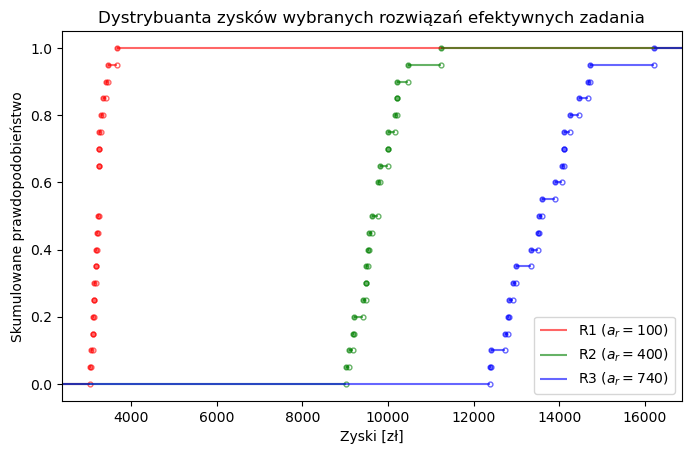

In [55]:
profit_max = profits_sorted.values[:, -1].max()
profit_min = profits_sorted.values[:, 0].min()
margin = (profit_max - profit_min) * 0.05
plt.figure(figsize=(8, 4.8))

for (key, row), color in zip(profits_sorted.iterrows(), "rgb"):
    label = f"R{key[1]} ($a_r = {key[0]}$)"
    
    # lines
    xs = np.array([profit_min - margin, *row.values, profit_max + margin])
    ys = np.array(range(n_scenarios + 1)) / n_scenarios
    plt.hlines(ys, xs[:-1], xs[1:], color, label=label, alpha=0.6)

    # start points
    filter = [True] + [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])]
    style={"s": 12, "facecolors":"white", "edgecolors": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[:-1][filter], **style)

    # end points
    filter = [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])] + [True]
    style={"s": 12, "c": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[1:][filter], **style)

plt.title("Dystrybuanta zysków wybranych rozwiązań efektywnych zadania")
plt.xlabel("Zyski [zł]")
plt.ylabel("Skumulowane prawdopodobieństwo")
plt.legend(loc="lower right")
plt.xlim((profit_min - margin, profit_max + margin))
plt.savefig("../out/z2-c-plot.png")
plt.show()